<a href="https://colab.research.google.com/github/Shijin880/ML-For-Beginners/blob/main/decisiontreeclassifierupd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('goibibo_flights_data.csv')

<ipython-input-4-964495ceea6e>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('goibibo_flights_data.csv')


In [ ]:
df.head()

flight date   airline flight_num    class   from dep_time      to arr_time  \
0  26-06-2023  SpiceJet    SG-8709  economy  Delhi    18:55  Mumbai    21:05   
1  26-06-2023  SpiceJet    SG-8157  economy  Delhi     6:20  Mumbai     8:40   
2  26-06-2023   AirAsia     I5-764  economy  Delhi     4:25  Mumbai     6:35   
3  26-06-2023   Vistara     UK-995  economy  Delhi    10:20  Mumbai    12:35   
4  26-06-2023   Vistara     UK-963  economy  Delhi     8:50  Mumbai    11:10   

  duration  price     stops  
0  02h 10m  6,013  non-stop  
1  02h 20m  6,013  non-stop  
2  02h 10m  6,016  non-stop  
3  02h 15m  6,015  non-stop  
4  02h 20m  6,015  non-stop

In [ ]:
import re
def convert_duration_in_minutes(duration_str):
    hours,minutes=map(int,duration_str[:-1].split('h'))

In [ ]:
duration_pattern=re.compile(r"^\d+h \d+m$")

In [ ]:
df['duration']=df['duration'].astype(str).apply(lambda x:x if duration_pattern.match(x) else None )

In [ ]:
df['duration'].dropna()

0      02h 10m
1      02h 20m
2      02h 10m
3      02h 15m
4      02h 20m
        ...   
193    13h 15m
194    25h 45m
195    11h 25m
196    11h 30m
197    16h 10m
Name: duration, Length: 198, dtype: object

In [ ]:
df.dropna(subset=['duration'], inplace=True)
df['duration_minutes']=df['duration'].apply(convert_duration_in_minutes)

In [ ]:
df.head()

flight date   airline flight_num    class   from dep_time      to arr_time  \
0  26-06-2023  SpiceJet    SG-8709  economy  Delhi    18:55  Mumbai    21:05   
1  26-06-2023  SpiceJet    SG-8157  economy  Delhi     6:20  Mumbai     8:40   
2  26-06-2023   AirAsia     I5-764  economy  Delhi     4:25  Mumbai     6:35   
3  26-06-2023   Vistara     UK-995  economy  Delhi    10:20  Mumbai    12:35   
4  26-06-2023   Vistara     UK-963  economy  Delhi     8:50  Mumbai    11:10   

  duration  price     stops duration_minutes  
0  02h 10m  6,013  non-stop             None  
1  02h 20m  6,013  non-stop             None  
2  02h 10m  6,016  non-stop             None  
3  02h 15m  6,015  non-stop             None  
4  02h 20m  6,015  non-stop             None

In [ ]:
import re
def convert_duration_in_minutes(duration_str) :
    hours,minutes=map(int,duration_str[:-1].split('h'))
    return hours*60+minutes
duration_pattern= re.compile(r"^\d+h \d+m$")
df['duration']=df['duration'].astype(str).apply(lambda x:x if duration_pattern.match(x) else None)
df.dropna(subset=['duration'],inplace=True)
df['duration_minutes']=df['duration'].apply(convert_duration_in_minutes)

In [ ]:
df.head()

flight date   airline flight_num    class   from dep_time      to arr_time  \
0  26-06-2023  SpiceJet    SG-8709  economy  Delhi    18:55  Mumbai    21:05   
1  26-06-2023  SpiceJet    SG-8157  economy  Delhi     6:20  Mumbai     8:40   
2  26-06-2023   AirAsia     I5-764  economy  Delhi     4:25  Mumbai     6:35   
3  26-06-2023   Vistara     UK-995  economy  Delhi    10:20  Mumbai    12:35   
4  26-06-2023   Vistara     UK-963  economy  Delhi     8:50  Mumbai    11:10   

  duration  price     stops  duration_minutes  
0  02h 10m  6,013  non-stop               130  
1  02h 20m  6,013  non-stop               140  
2  02h 10m  6,016  non-stop               130  
3  02h 15m  6,015  non-stop               135  
4  02h 20m  6,015  non-stop               140

In [ ]:
import re
def convert_duration_in_seconds(duration_str):
    hours,minutes=map(int,duration_str[:-1].split('h'))
    return hours*3600 +minutes*60
duration_pattern=re.compile(r"^\d+h \d+m$")
df['duration']=df['duration'].astype(str).apply(lambda x:x if duration_pattern.match(x) else None)
df.dropna(subset=['duration'],inplace=True)
df['duration_seconds']=df['duration'].apply(convert_duration_in_seconds)

In [ ]:
df.head()

flight date   airline flight_num    class   from dep_time      to arr_time  \
0  26-06-2023  SpiceJet    SG-8709  economy  Delhi    18:55  Mumbai    21:05   
1  26-06-2023  SpiceJet    SG-8157  economy  Delhi     6:20  Mumbai     8:40   
2  26-06-2023   AirAsia     I5-764  economy  Delhi     4:25  Mumbai     6:35   
3  26-06-2023   Vistara     UK-995  economy  Delhi    10:20  Mumbai    12:35   
4  26-06-2023   Vistara     UK-963  economy  Delhi     8:50  Mumbai    11:10   

  duration  price     stops  duration_minutes  duration_seconds  
0  02h 10m  6,013  non-stop               130              7800  
1  02h 20m  6,013  non-stop               140              8400  
2  02h 10m  6,016  non-stop               130              7800  
3  02h 15m  6,015  non-stop               135              8100  
4  02h 20m  6,015  non-stop               140              8400

In [ ]:
df.drop(columns=['flight date','from','dep_time','to','arr_time','duration'],inplace=True)

In [ ]:
df.head()

airline flight_num    class  price     stops  duration_minutes  \
0  SpiceJet    SG-8709  economy  6,013  non-stop               130   
1  SpiceJet    SG-8157  economy  6,013  non-stop               140   
2   AirAsia     I5-764  economy  6,016  non-stop               130   
3   Vistara     UK-995  economy  6,015  non-stop               135   
4   Vistara     UK-963  economy  6,015  non-stop               140   

   duration_seconds  
0              7800  
1              8400  
2              7800  
3              8100  
4              8400

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df['airline']=le.fit_transform(df['airline'])
df['flight_num']=le.fit_transform(df['flight_num'])
df['class']=le.fit_transform(df['class'])
df['stops']=le.fit_transform(df['stops'])

In [ ]:
df['price']=df['price'].str.replace(',','').astype(int)

In [ ]:
df.head()

airline  flight_num  class  price  stops  duration_minutes  \
0        4          85      0   6013      6               130   
1        4          83      0   6013      6               140   
2        1          77      0   6016      6               130   
3        5         117      0   6015      6               135   
4        5         114      0   6015      6               140   

   duration_seconds  
0              7800  
1              8400  
2              7800  
3              8100  
4              8400

In [ ]:
def affordable(row):
  if row['price']<8000 :
    return '1'
  else:
    return 'o'
df['affordable']=df.apply(affordable,axis=1)

In [ ]:
df.head()

airline  flight_num  class  price  stops  duration_minutes  \
0        4          85      0   6013      6               130   
1        4          83      0   6013      6               140   
2        1          77      0   6016      6               130   
3        5         117      0   6015      6               135   
4        5         114      0   6015      6               140   

   duration_seconds affordable  
0              7800          1  
1              8400          1  
2              7800          1  
3              8100          1  
4              8400          1

In [ ]:
df.tail()

airline  flight_num  class  price  stops  duration_minutes  \
193        0          53      0  12802      0               795   
194        4          79      0  12979      0              1545   
195        0          37      0  13120      0               685   
196        0          53      0  13120      0               690   
197        0          44      0  13120      0               970   

     duration_seconds affordable  
193             47700          o  
194             92700          o  
195             41100          o  
196             41400          o  
197             58200          o

In [ ]:
X=df[['airline','stops','duration_minutes']]
Y=df['affordable']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
scale=StandardScaler()

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)

In [ ]:
clf=DecisionTreeClassifier()

In [ ]:
clf.fit(X_train_scaled,Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred=clf.predict(X_test_scaled)

In [ ]:
Y_pred

array(['o', 'o', '1', '1', '1', '1', '1', 'o', '1', 'o', '1', '1', 'o',
       'o', 'o', 'o', '1', '1', '1', 'o', 'o', 'o', 'o', 'o', 'o', 'o',
       '1', 'o', 'o', 'o', 'o', '1', '1', 'o', '1', 'o', 'o', 'o', '1',
       '1'], dtype=object)

In [ ]:
CM=confusion_matrix(Y_test,Y_pred)

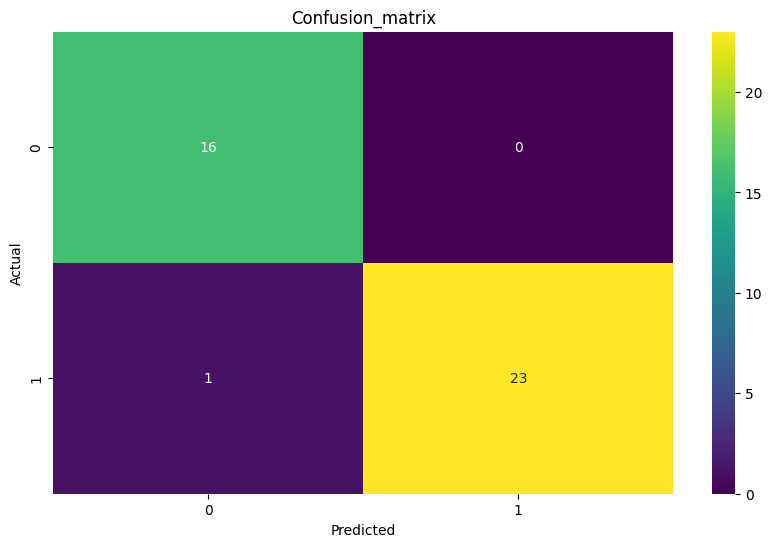

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(CM,annot=True,fmt='d',cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion_matrix')
plt.show()

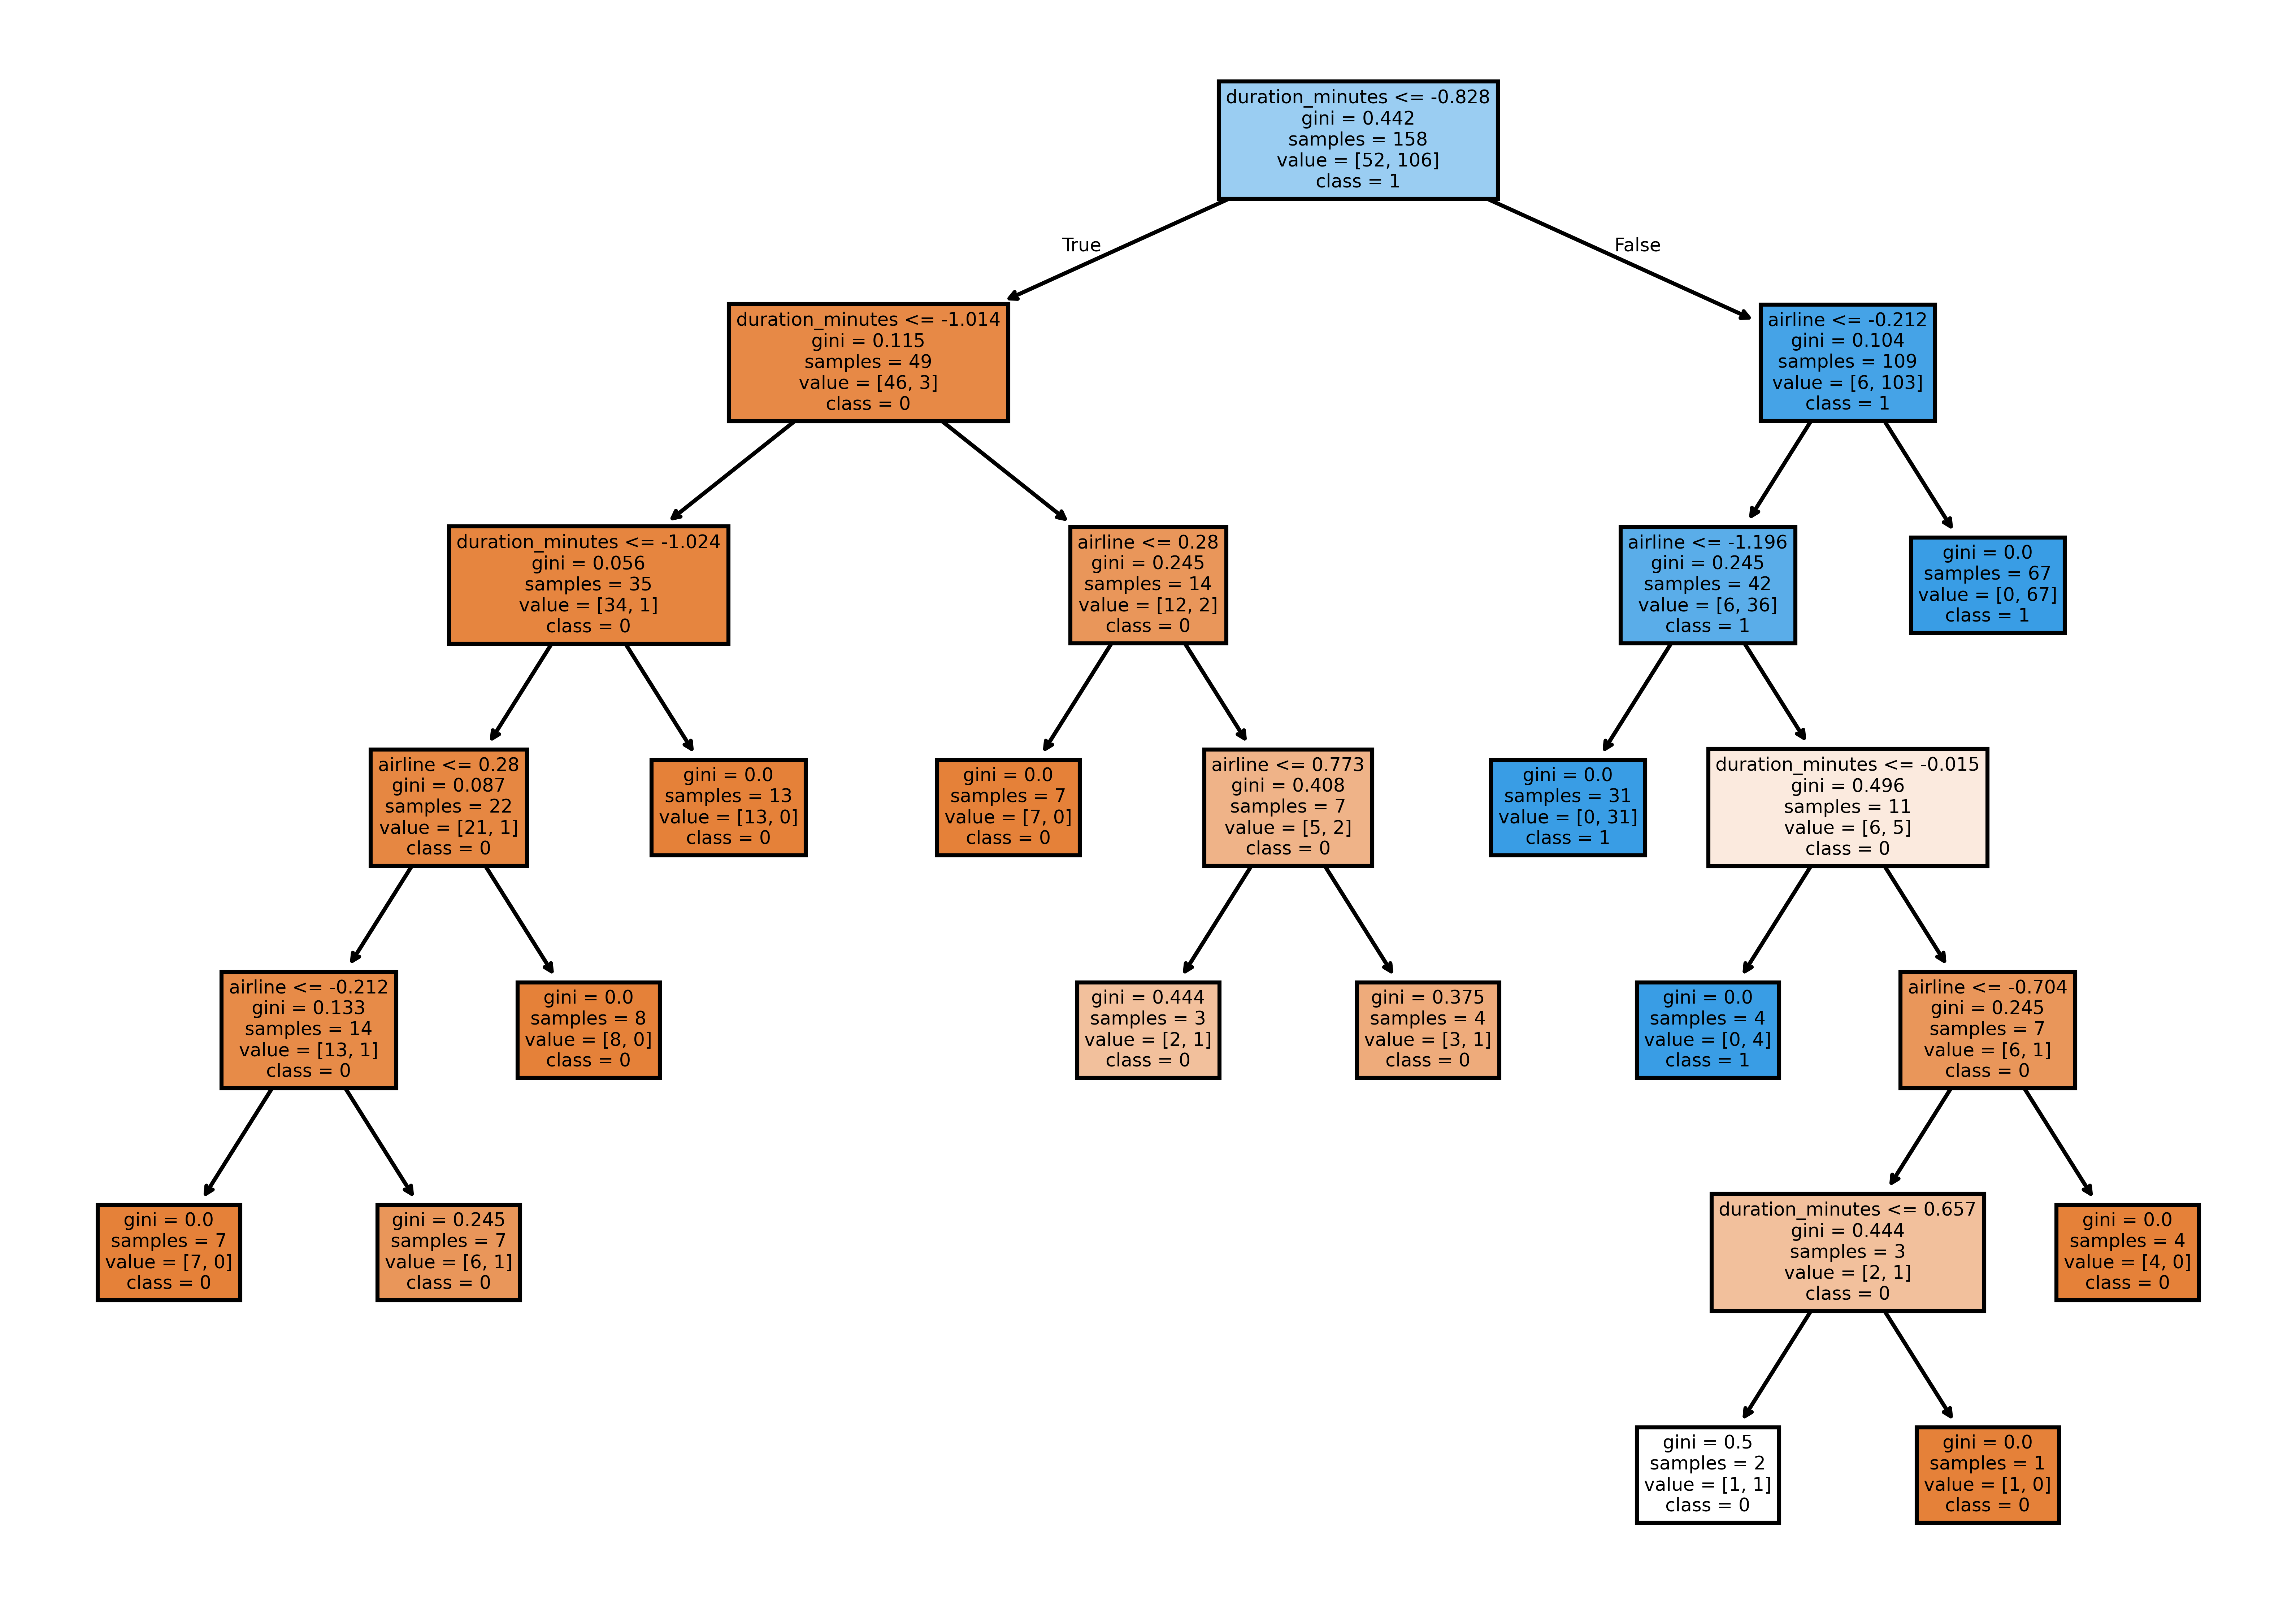

In [ ]:
plt.figure(figsize=(10,7),dpi=800)
plot_tree(clf,filled=True,feature_names=X.columns,class_names=['0','1'])
plt.show()

In [ ]:
path=clf.cost_complexity_pruning_path(X_train_scaled,Y_train)
ccp_alphas=path.ccp_alphas
impurites=path.impurities
trees=[]
for ccp_alpha in ccp_alphas :
    clf_pruned=DecisionTreeClassifier(random_state=42)
    clf_pruned.fit(X_train_scaled,Y_train)
    trees.append(clf_pruned)
testing_scores = [clf.score(X_test, Y_test) for clf in trees]
best_tree = trees[testing_scores.index(max(testing_scores))]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without

In [ ]:
plt.figure(figsize=(20, 20),dpi=800)
plot_tree(best_tree, filled=True)
plt.show()

In [ ]:
print("Best Pruned Tree Testing Accuracy:", best_tree.score(X_test, Y_test))

Best Pruned Tree Testing Accuracy: 0.6


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
